In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/honey-production/honeyraw_2003to2007.csv
/kaggle/input/honey-production/honeyproduction.csv
/kaggle/input/honey-production/honeyraw_1998to2002.csv
/kaggle/input/honey-production/honeyraw_2008to2012.csv


In [2]:
data = pd.read_csv('../input/honey-production/honeyproduction.csv')
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
data[['state', 'totalprod']].groupby('state').mean().round()

,totalprod
state,
AL,825467.0
AR,2810400.0
AZ,2032267.0
CA,23169000.0
CO,1750600.0
FL,16469867.0
GA,3299933.0
HI,843133.0
IA,2080000.0


In [4]:
data['year'].nunique()

15

**Which state has highest volume in production and in which year?**

In [5]:
data[data['totalprod'] == data['totalprod'].max()]

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
532,ND,510000.0,91,46410000.0,12995000.0,1.5,69615000.0,2010


In [6]:
data[['year','yieldpercol']].groupby('year').mean().round()

,yieldpercol
year,
1998,70.0
1999,65.0
2000,68.0
2001,65.0
2002,67.0
2003,63.0
2004,65.0
2005,64.0
2006,62.0


In [7]:
cor = data[['numcol',
           'yieldpercol',
           'totalprod',
           'stocks',
           'priceperlb',
           'prodvalue']].corr()
cor

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


<AxesSubplot:>

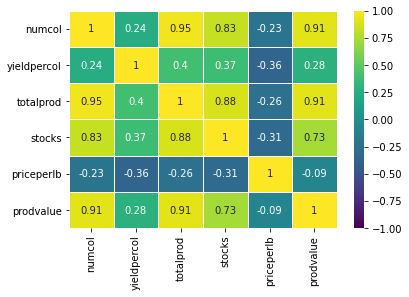

In [8]:
sns.heatmap(cor,annot = True,cmap='viridis',vmin=-1,vmax=1,linewidth =1)

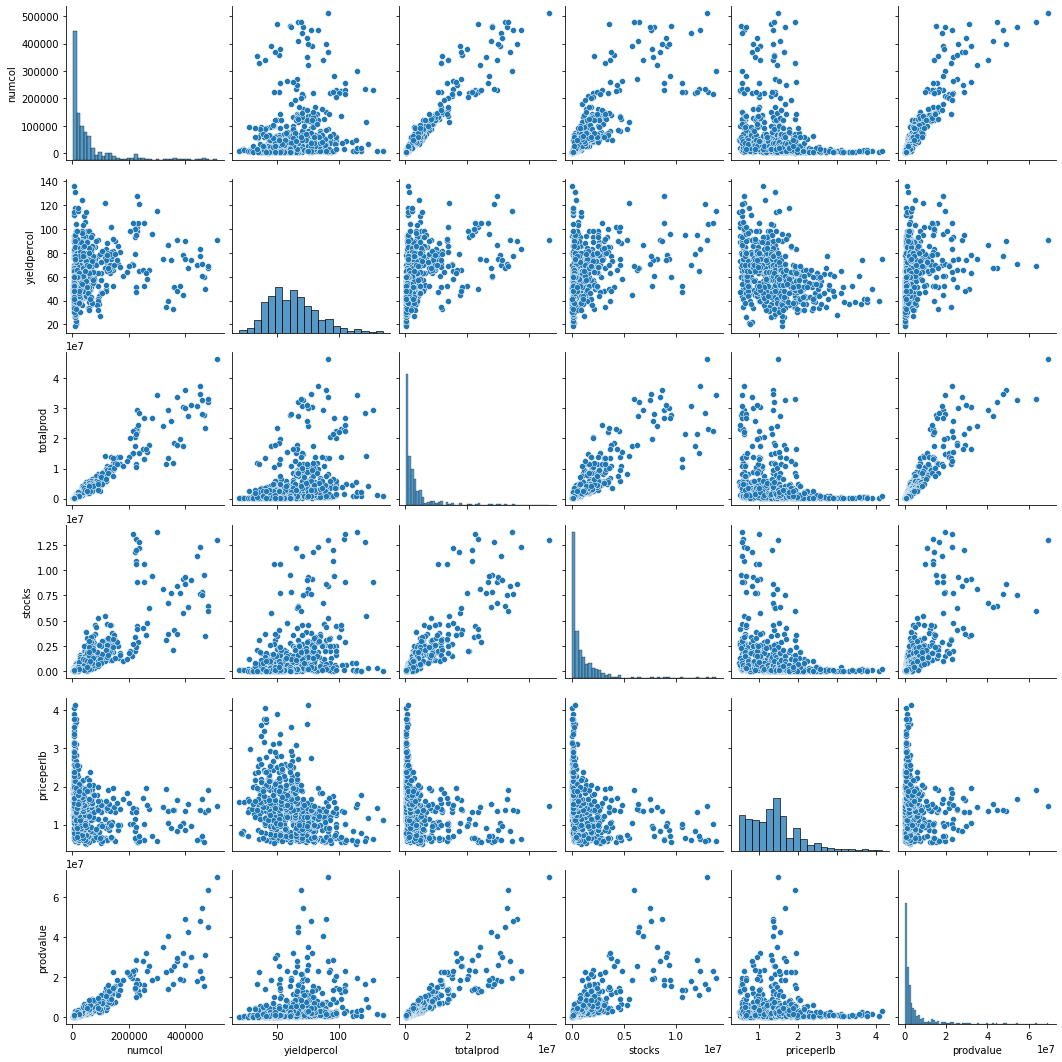

In [9]:
sns.pairplot(data.drop('year',axis=1))

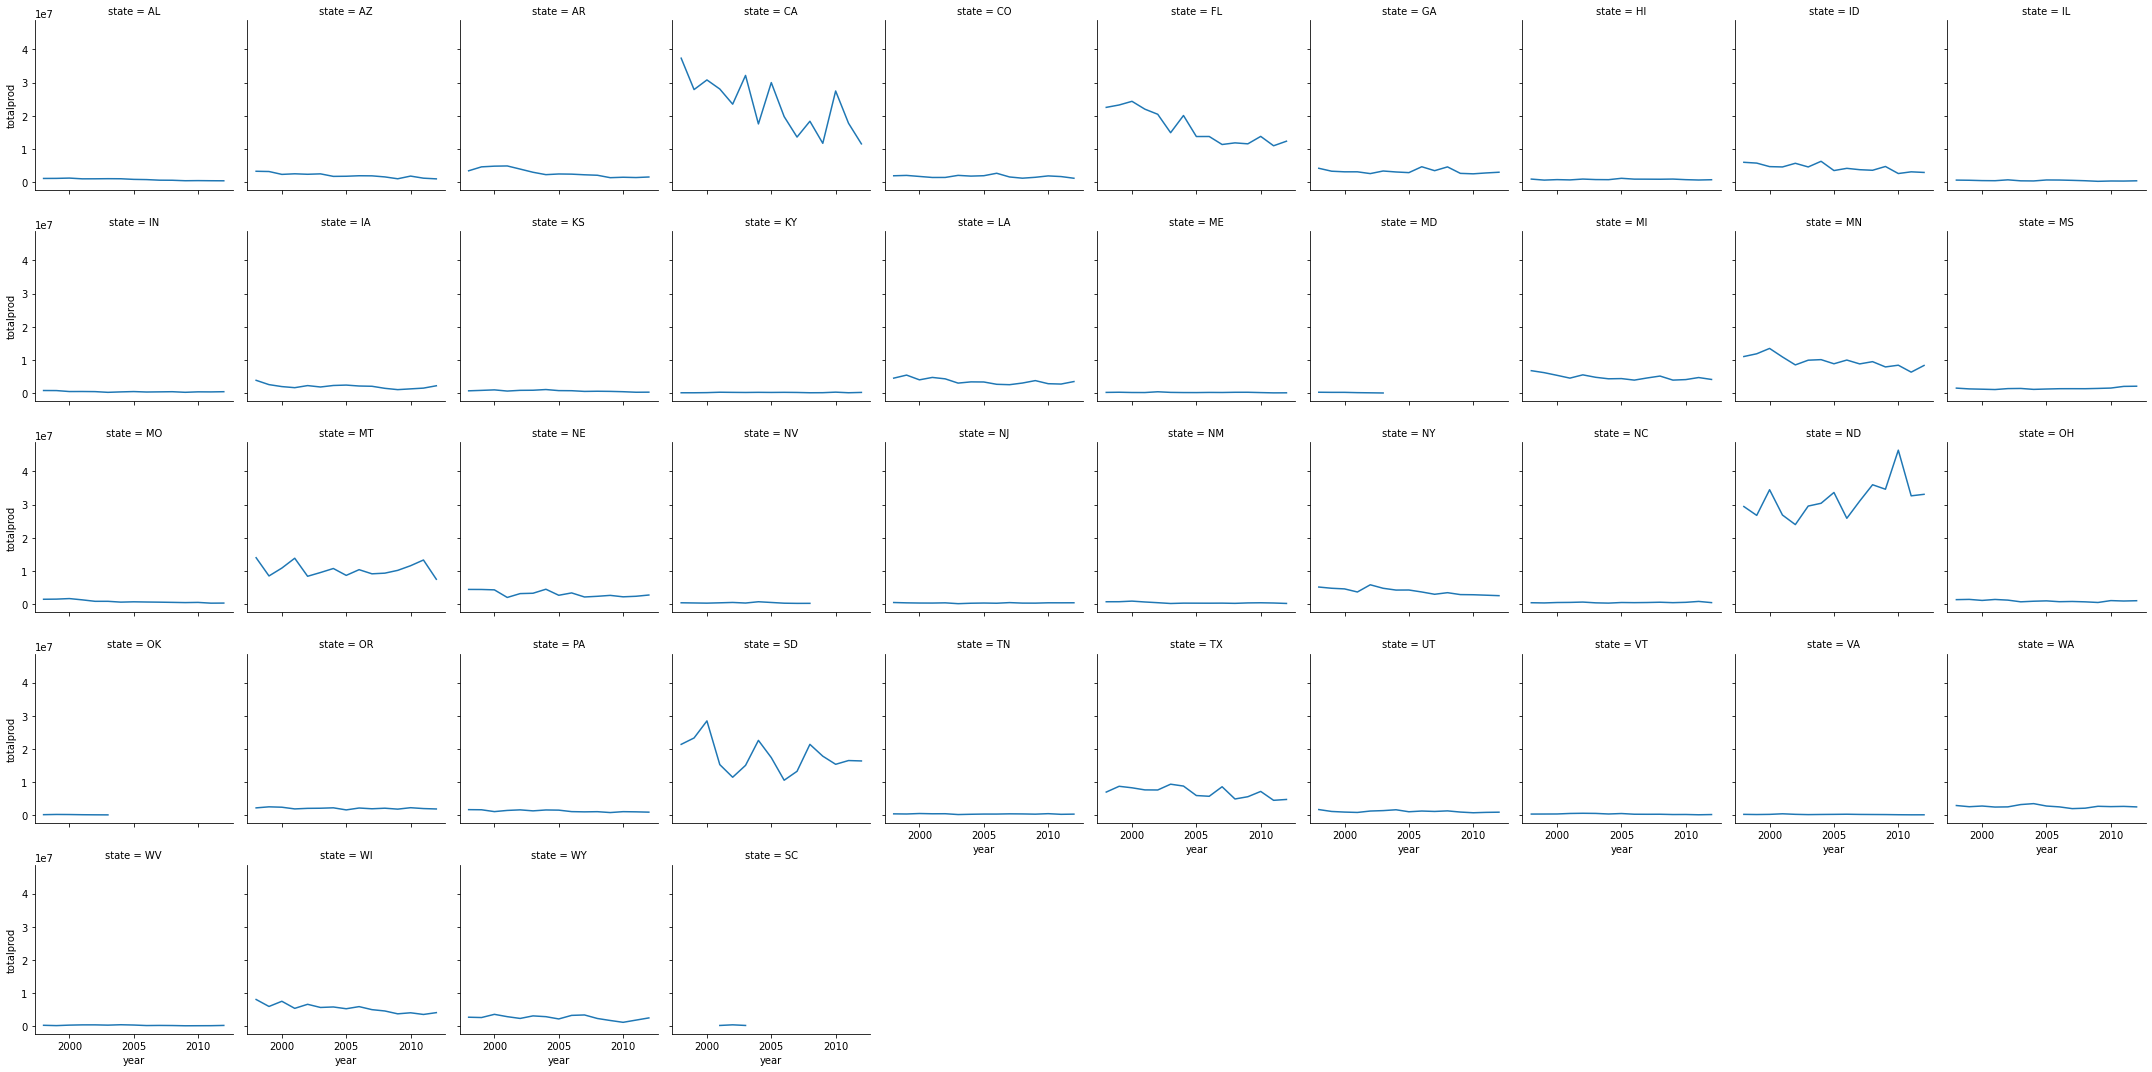

In [10]:
g= sns.FacetGrid(data,col='state',col_wrap=10,size=3)
g = g.map(plt.plot,'year','totalprod')

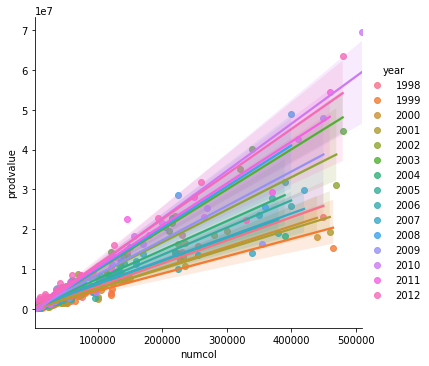

In [11]:
sns.lmplot(x='numcol',y='prodvalue',data=data,hue='year')

production value per colony increases every year

<AxesSubplot:xlabel='year', ylabel='prodvalue'>

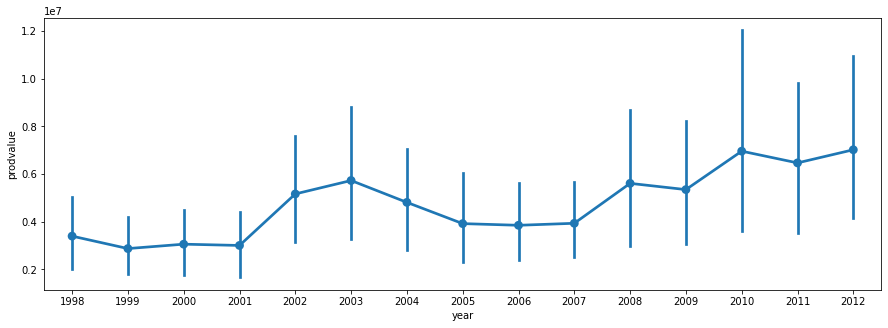

In [12]:
plt.figure(figsize=(15,5))
sns.pointplot('year','prodvalue',data = data)
# plt.show()

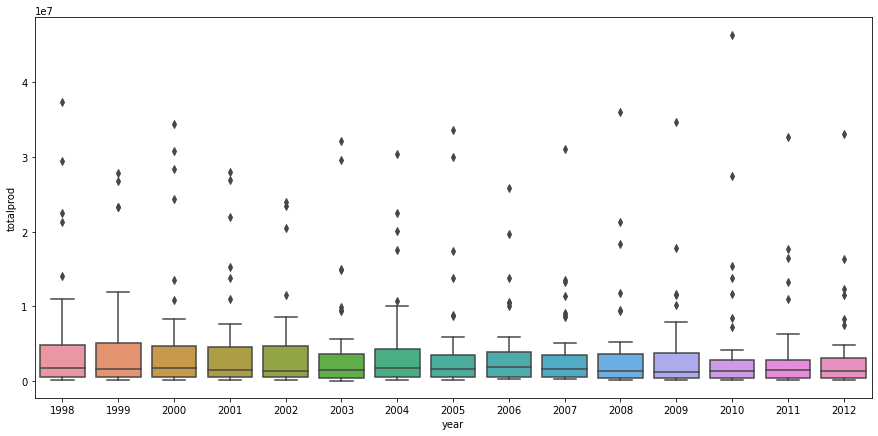

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot('year','totalprod',data = data)
plt.show()